### **Problem Statement**
To identify the best customer type to sell to

### **Understanding the Context**

Hotels are keen on growing there revenue throughout the year, hence, the management seeks to segement customers into groups so that they have tailored product each segement. 
The features may help describe hotel customers are: 

* 'hotel
* adr -  Average Daily rate
* lead_time - the time taken between when a customer makes a reservation and their actual arrival
* arrival_date_year
* arrival_date_month
* arrival_date_week_number
* arrival_date_day_of_month
* stays_in_weekend_nights
* stays_in_week_nights
* adults and etc....






### **Definition of Metric of Success**

The project will be a success when we:

come up with distinct customer group that can guide in design  of tailored products

### **Experimental Design**

The experimental design is as follows: 

* Exploratory Data Analysis
* Data Cleaning
*Univariate Analysis
*Bivariate Analysis
*Multivariate Analysis
*Applying clustering alogrithms.

### **Data Relevance**

Data source: https://www.kaggle.com/jessemostipak/hotel-booking-demand

The relavance of our data will be answered by the following questions.

How accurate is the data?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

In [0]:
#importing libaries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
hotel_df = pd.read_csv('/content/hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [0]:
# previewing the last observations of the dataset

hotel_df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
66443,City Hotel,1,125,2017,April,16,20,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,33.0,NaN,0,Transient,85.0,0,0,Canceled,2016-12-16
66444,City Hotel,1,125,2017,April,16,20,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,33.0,NaN,0,Transient,85.0,0,0,Canceled,2016-12-16
66445,City Hotel,1,143,2017,April,16,20,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,33.0,NaN,18,Transient,85.0,0,0,Canceled,2016-12-16
66446,City Hotel,1,125,2017,April,16,20,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,33.0,NaN,0,Transient,85.0,0,0,Canceled,2016-12-16
66447,City Hotel,1,125,2017,April,16,20,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,33.0,NaN,0,Transient,85.0,0,0,Canceled,NaN


In [0]:
# checking the datatypes of the dataset

hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [0]:
# checking the basic information of the dataset

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66448 entries, 0 to 66447
Data columns (total 32 columns):
hotel                             66448 non-null object
is_canceled                       66448 non-null int64
lead_time                         66448 non-null int64
arrival_date_year                 66448 non-null int64
arrival_date_month                66448 non-null object
arrival_date_week_number          66448 non-null int64
arrival_date_day_of_month         66448 non-null int64
stays_in_weekend_nights           66448 non-null int64
stays_in_week_nights              66448 non-null int64
adults                            66448 non-null int64
children                          66444 non-null float64
babies                            66448 non-null int64
meal                              66448 non-null object
country                           65962 non-null object
market_segment                    66448 non-null object
distribution_channel              66448 non-null object
is_

In [0]:
# to check for the statistical description of the data

hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,66448.0,0.478073,0.499523,0.00,0.0,0.0,1.0,1.0
lead_time,66448.0,104.299031,107.474579,0.00,19.0,70.0,160.0,737.0
arrival_date_year,66448.0,2016.043463,0.695183,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,66448.0,27.524696,14.175895,1.00,15.0,29.0,39.0,53.0
arrival_date_day_of_month,66448.0,15.670675,8.805025,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,66448.0,1.031242,1.083307,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,66448.0,2.801589,2.188328,0.00,1.0,2.0,4.0,50.0
adults,66448.0,1.864812,0.619081,0.00,2.0,2.0,2.0,55.0
children,66444.0,0.111327,0.416093,0.00,0.0,0.0,0.0,10.0
babies,66448.0,0.009662,0.105801,0.00,0.0,0.0,0.0,10.0


In [0]:
# checking the shape of the dataset

hotel_df.shape

(66448, 32)

## DATA CLEANING

## DUPLICATES AND UNIQUE VALUES

In [0]:
# cehcking for duplicates

hotel_df.duplicated().any()

True

In [0]:
# deleting duplicates

hotel_df = hotel_df.drop_duplicates()
hotel_df.shape

(48456, 32)

In [0]:
# previewing the unique values of each of our columns

my_cols = hotel_df.columns.to_list()

for column in my_cols:
    print("\n")
    print("Column Name:", column)
    print(hotel_df[column].unique())



Column Name: hotel
['Resort Hotel' 'City Hotel']


Column Name: is_canceled
[0 1]


Column Name: lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 33

In [0]:
# checking for missing values

hotel_df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7429
company                           45679


In [0]:
# to get the percentage of the missing values

hotel_df.isna().mean().round(4) * 100

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.01
babies                             0.00
meal                               0.00
country                            0.93
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             15.33
company                           94.27


The company variable will be dropped as it has 93% of missing values.

The rows with missing values on the country and children varaibles will be dropped too.

As the agent variable is ID of the travel agency that made the booking, it will not affect out anaalysis. This variable will be dropped.

In [0]:
# dropping the company and agent columns
# hotel_booking.head()
hotel_df = hotel_df.drop(['company', 'agent'], axis=1, inplace = False)
hotel_df.shape

(48456, 30)

In [0]:
# dropping the missing values

hotel_df = hotel_df.dropna()
hotel_df.shape

(48001, 30)

## CHECKING FOR OUTLIERS

In [0]:
# checking the datatypes of the columns 

hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

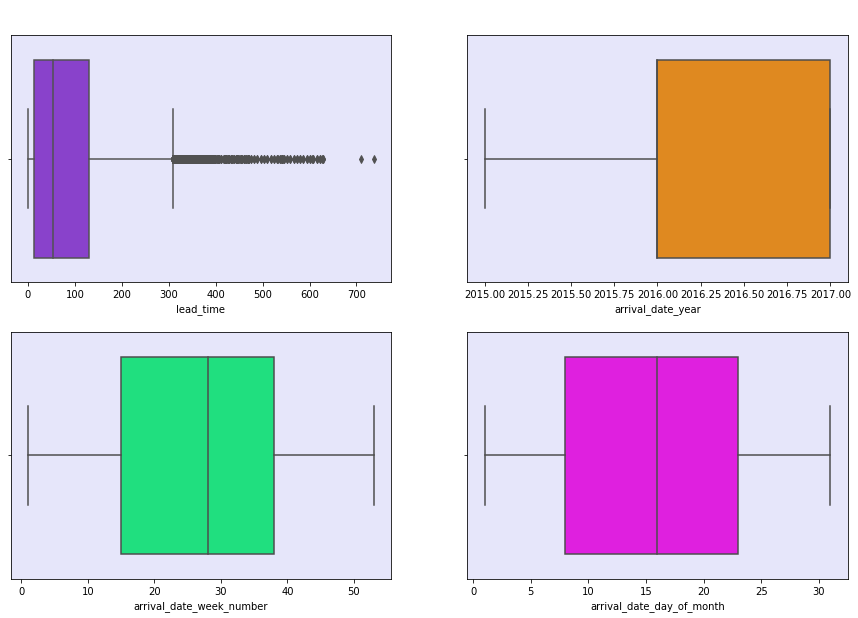

In [0]:
# Creating a list of numerical columns to check for outliers
# Creating a list of colors for the 
#
col_list = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'White')
for ax, data, column, color in zip(axes.flatten(), hotel_df, col_list, colors):
  sb.boxplot(hotel_df[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

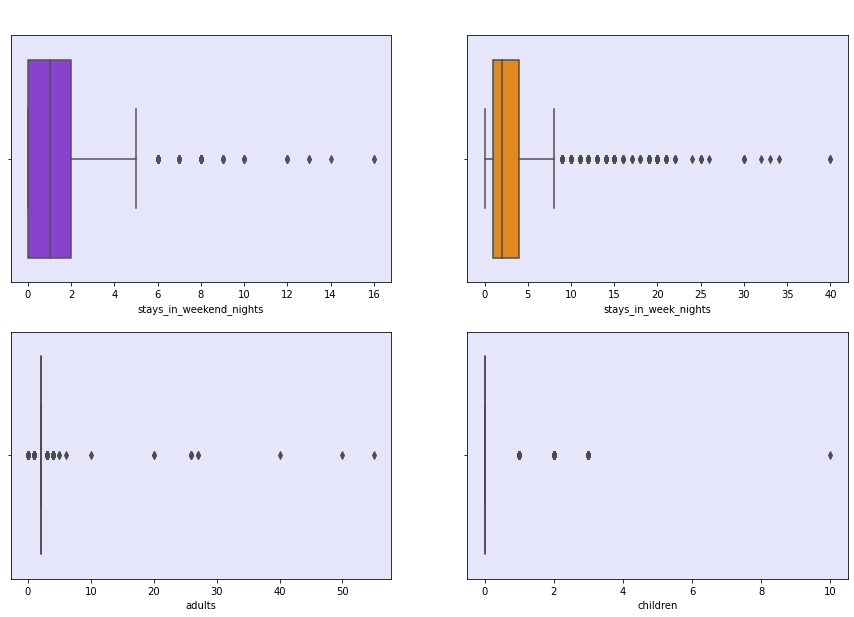

In [0]:
# Creating a list of numerical columns to check for outliers
# Creating a list of colors for the 
#
col_list = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'White')
for ax, data, column, color in zip(axes.flatten(), hotel_df, col_list, colors):
  sb.boxplot(hotel_df[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

The dataset generally has many outliers. We will however not drop the outliers as we will use them for data analysis.

# EXPLORATORY DATA ANALYSIS

## Univariate Analysis

### 1. Distribution

Column: is_canceled


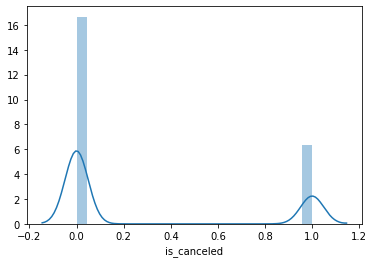

Column: lead_time


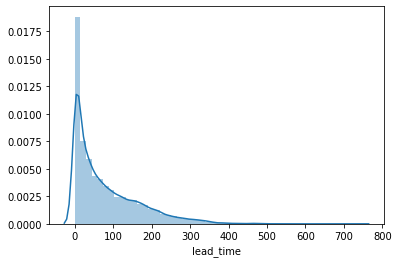

Column: arrival_date_year


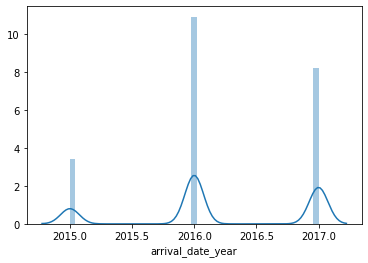

Column: arrival_date_week_number


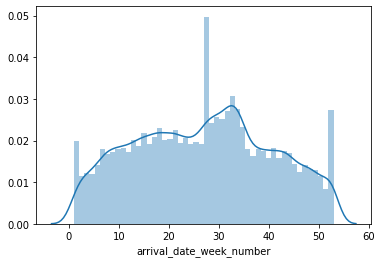

Column: arrival_date_day_of_month


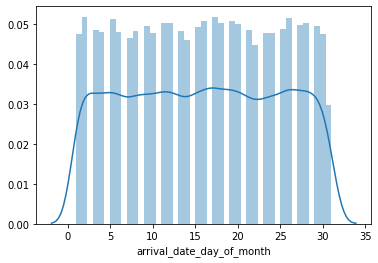

Column: stays_in_weekend_nights


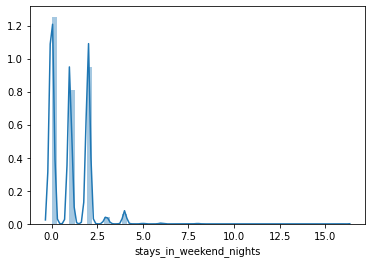

Column: stays_in_week_nights


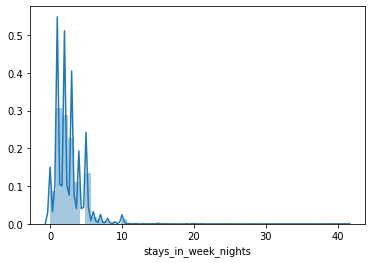

Column: adults


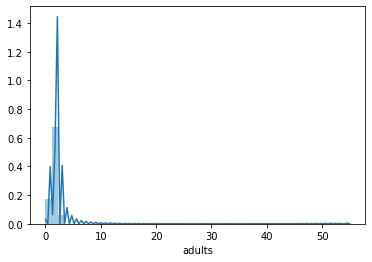

Column: children


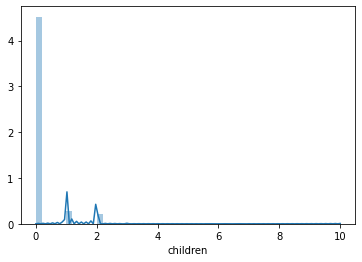

Column: babies


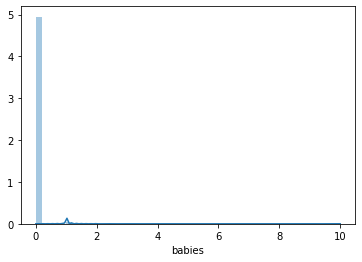

Column: is_repeated_guest


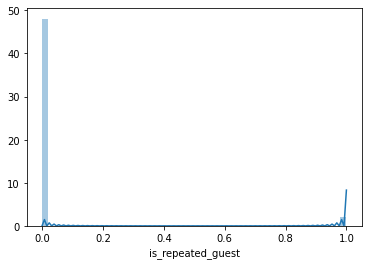

Column: previous_cancellations


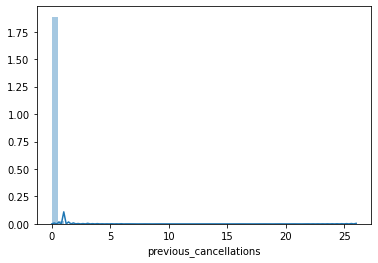

Column: previous_bookings_not_canceled


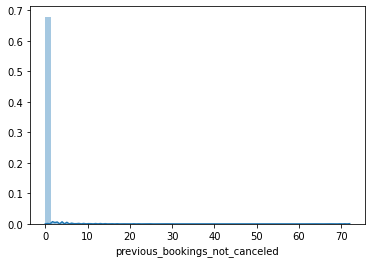

Column: booking_changes


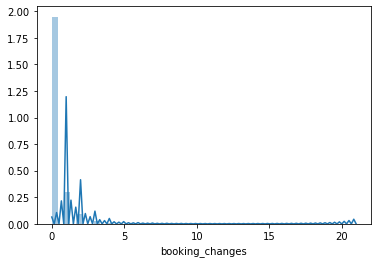

Column: days_in_waiting_list


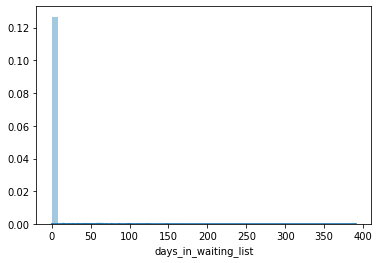

Column: adr


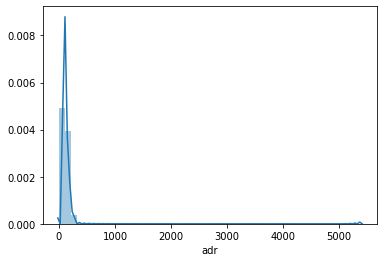

Column: required_car_parking_spaces


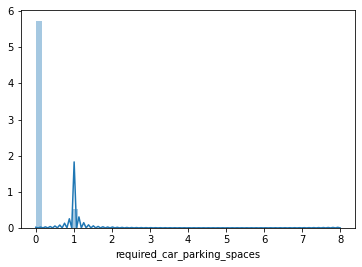

Column: total_of_special_requests


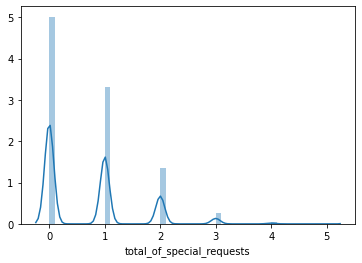

In [0]:
# selecting all numeric columns and plotting their distributions
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = hotel_df.select_dtypes(include = numerics)

# create a list containing this dataset's column names
num_cols = num_df.columns

# previewing the histograms of each numerical variable
for column in num_cols:
    sb.distplot(hotel_df[column])
    print("Column:", column)
    plt.show()

### 2. Frequency

Column: hotel


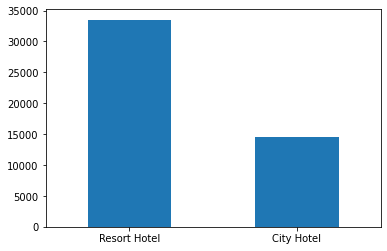

Column: arrival_date_month


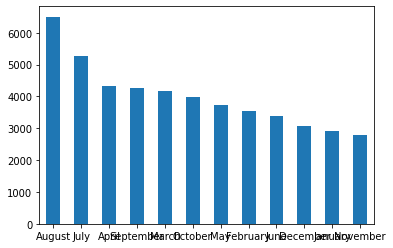

Column: meal


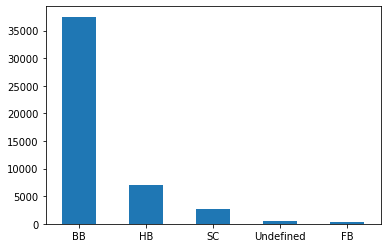

Column: country


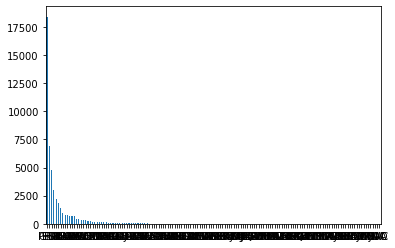

Column: market_segment


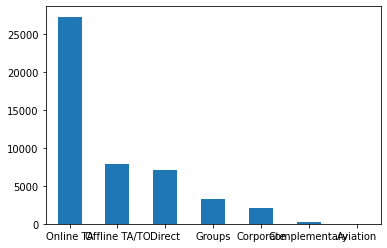

Column: distribution_channel


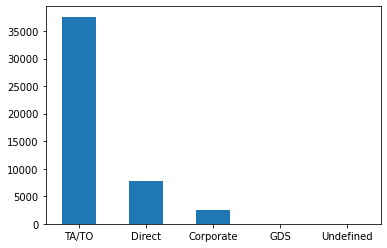

Column: reserved_room_type


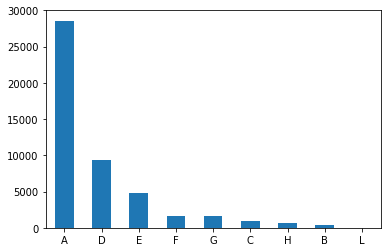

Column: assigned_room_type


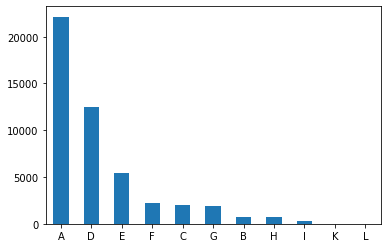

Column: deposit_type


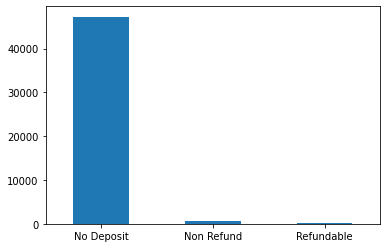

Column: customer_type


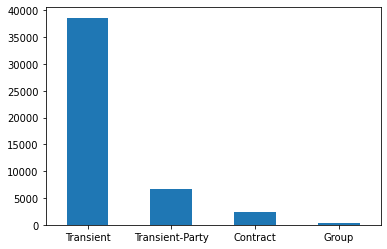

Column: reservation_status


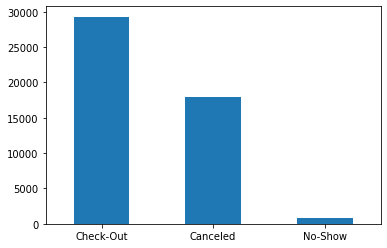

Column: reservation_status_date


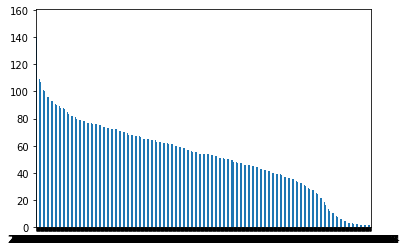

In [0]:
# selecting all object datatypes
objects = ['object']
obj_df = hotel_df.select_dtypes(include = objects)
obj_cols = obj_df.columns

# plotting the value counts of each object variable
for obj in obj_cols:
    hotel_df[obj].value_counts().plot(kind = 'bar', rot = 0)
    print("Column:", obj)
    plt.show()

## Bivariate Analysis

### 1. Correlation

In [0]:
# correlations
corr = hotel_df.corr()
corr

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.138215,0.133302,-0.024944,0.001956,0.014496,0.012351,0.083399,0.089928,-0.034754,-0.136658,0.034164,-0.089805,-0.119287,-0.012858,0.171709,-0.283061,-0.104910
lead_time,0.138215,1.000000,0.116873,0.112374,-0.000704,0.292438,0.361181,0.119638,0.015553,0.006212,-0.131186,0.028083,-0.087211,0.091772,0.143302,0.037841,-0.112167,0.027273
arrival_date_year,0.133302,0.116873,1.000000,-0.533354,-0.008527,0.039475,0.034711,0.004481,0.051742,-0.017376,0.080777,-0.034954,0.066959,0.013921,-0.027257,0.116322,-0.000531,0.040594
arrival_date_week_number,-0.024944,0.112374,-0.533354,1.000000,0.098536,0.027222,0.031675,0.037484,0.010577,0.014344,-0.067666,0.013640,-0.048659,0.007767,0.015848,0.127422,0.007069,0.058775
arrival_date_day_of_month,0.001956,-0.000704,-0.008527,0.098536,1.000000,-0.021459,-0.035074,-0.000651,0.014421,-0.001151,0.004815,-0.009336,0.007426,0.009578,0.009517,0.023462,0.011872,0.003667
stays_in_weekend_nights,0.014496,0.292438,0.039475,0.027222,-0.021459,1.000000,0.667301,0.076821,0.032337,0.013468,-0.105477,-0.003597,-0.077279,0.050887,-0.041825,0.069709,-0.067189,0.051578
stays_in_week_nights,0.012351,0.361181,0.034711,0.031675,-0.035074,0.667301,1.000000,0.076973,0.030639,0.014557,-0.106583,0.000984,-0.073397,0.081259,-0.004240,0.083639,-0.076564,0.054675
adults,0.083399,0.119638,0.004481,0.037484,-0.000651,0.076821,0.076973,1.000000,0.035977,0.017984,-0.123535,-0.016142,-0.119745,-0.020101,-0.015772,0.196041,0.007604,0.071238
children,0.089928,0.015553,0.051742,0.010577,0.014421,0.032337,0.030639,0.035977,1.000000,0.013304,-0.043738,-0.008964,-0.034317,0.033755,-0.024623,0.324823,0.026970,0.015423
babies,-0.034754,0.006212,-0.017376,0.014344,-0.001151,0.013468,0.014557,0.017984,0.013304,1.000000,-0.016891,-0.004145,-0.013268,0.084964,-0.008496,0.032597,0.032797,0.118045


## SCATTERPLOTS 

In [0]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

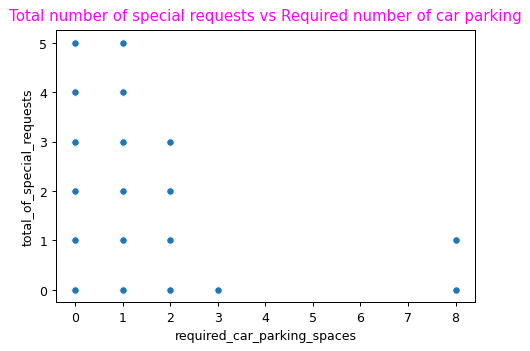

In [0]:
plt.figure(dpi = 90)
sb.scatterplot(hotel_df.required_car_parking_spaces, hotel_df.total_of_special_requests)
plt.title('Total number of special requests vs Required number of car parking', y= 1.01, color = 'magenta', fontsize = 12)
plt.show()

> There is no releationship between the special requests a customer asks for and the number of car parking spots required.

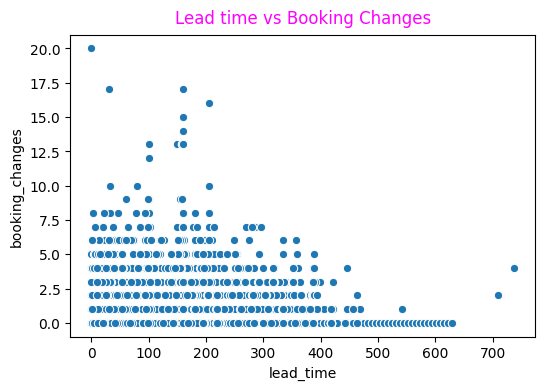

In [0]:
plt.figure(dpi = 100)
sb.scatterplot(hotel_df.lead_time, hotel_df.booking_changes)
plt.title('Lead time vs Booking Changes', y= 1.01, color = 'magenta', fontsize = 12)
plt.show()

> There is a positve relationship between the variables. Getting the coefficeitn correlation to further expalin the reationship. 

In [0]:
# calculating the pearson correlation coefficient of the variables
from scipy.stats import pearsonr
corr = pearsonr(hotel_df['lead_time'], hotel_df['booking_changes'])
corr

(0.09177230828415725, 2.7728338685173486e-90)

> The correlation coefficieent is 0.076 which represents a very low  positive correlation. This translates to the 2 variables do not have a significant nrelationship. 

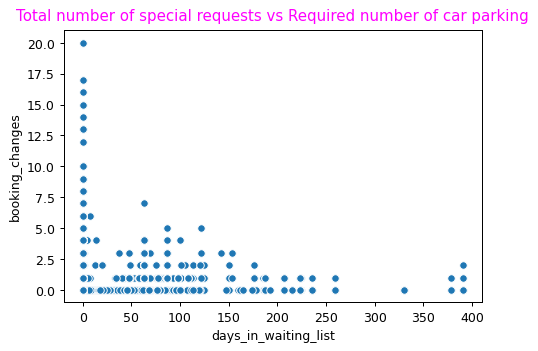

In [0]:
plt.figure(dpi = 90)
sb.scatterplot(hotel_df.days_in_waiting_list, hotel_df.booking_changes)
plt.title('Total number of special requests vs Required number of car parking', y= 1.01, color = 'magenta', fontsize = 12)
plt.show()

In [0]:
# coefficient correlation 

corr = pearsonr(hotel_df['days_in_waiting_list'], hotel_df['booking_changes'])
corr

(0.03007718850667737, 4.369625175227431e-11)

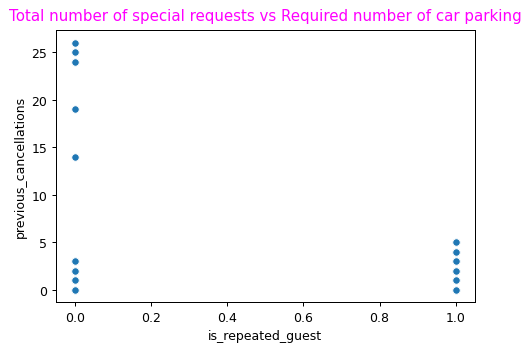

In [0]:
plt.figure(dpi = 90)
sb.scatterplot(hotel_df.is_repeated_guest, hotel_df.previous_cancellations)
plt.title('Total number of special requests vs Required number of car parking', y= 1.01, color = 'magenta', fontsize = 12)
plt.show()

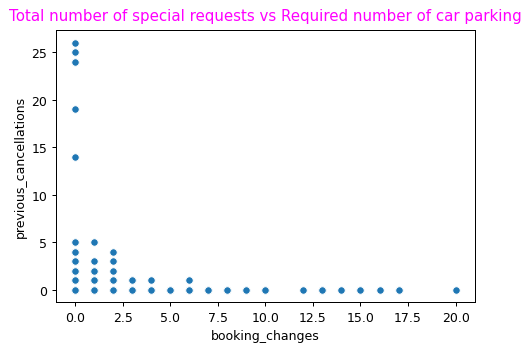

In [0]:
plt.figure(dpi = 90)
sb.scatterplot(hotel_df.booking_changes, hotel_df.previous_cancellations)
plt.title('Total number of special requests vs Required number of car parking', y= 1.01, color = 'magenta', fontsize = 12)
plt.show()

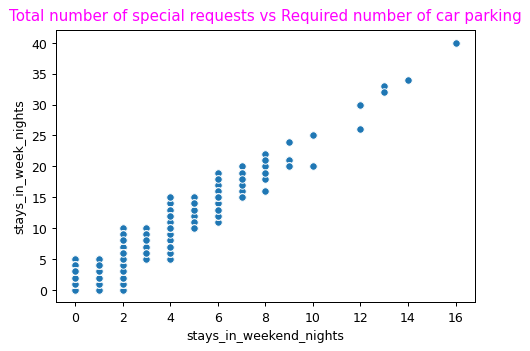

In [0]:
plt.figure(dpi = 90)
sb.scatterplot(hotel_df.stays_in_weekend_nights, hotel_df.stays_in_week_nights)
plt.title('Total number of special requests vs Required number of car parking', y= 1.01, color = 'magenta', fontsize = 12)
plt.show()

### CATEGORICAL AND CATEGORICAL VARIABLES

In [0]:
# downlaoding the researchpy library
pip install researchpy


In [0]:
# importing the necessary libraries

import researchpy as rp
from scipy import stats

### CUSTOMER TYPE AND HOTEL 

In [0]:
# to check for summary of Customer type and Hotel type booked 
rp.summary_cat(hotel_df[['customer_type', 'hotel']])

,Variable,Outcome,Count,Percent
0,customer_type,Transient,38633,80.48
1,,Transient-Party,6716,13.99
2,,Contract,2353,4.90
3,,Group,299,0.62
4,hotel,Resort Hotel,33522,69.84
5,,City Hotel,14479,30.16


In [0]:
# to cross tabulate the two variables
crosstab1 = pd.crosstab(hotel_df.customer_type , hotel_df.hotel, margins=True)

crosstab1.columns = ["City Hotel","Resort Hotel","row_totals"]
crosstab1.index = ["Contract","Group","Transient","Transient-Party","col_totals"]

observed = crosstab1.ix[0:4,0:2] # Get table without totals for later use
   
crosstab1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,City Hotel,Resort Hotel,row_totals
Contract,685,1668,2353
Group,32,267,299
Transient,11697,26936,38633
Transient-Party,2065,4651,6716
col_totals,14479,33522,48001


> Contract: They book more resorts than city hotels. 

> Group clients prefer city hotels to resorts. 

> Transient type of client has the highest frequency. Which means most csutomers are on transit. they have a higher preference for city hotels 

> Transient party customers also prefer city hotels. 

In [0]:

# To get the expected count for a cell, multiply the row total for that cell by the column total for that cell
#  and then divide by the total number of observations. 
# We can quickly get the expected counts for all cells in the table by taking the row totals and column totals of the table,
#  performing an outer product on them with the np.outer() function and dividing by the number of observations


expected =  np.outer(crosstab1["row_totals"][0:4],
                     crosstab1.ix["col_totals"][0:2]) / 86940

expected = pd.DataFrame(expected)

expected.columns = ["City Hotels","Resort Hotels"]
expected.index = ["contract","group","transient","transient party"]

expected

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,City Hotels,Resort Hotels
contract,391.868956,907.260939
group,49.795503,115.287302
transient,6433.945330,14895.967633
transient party,1118.483598,2589.530159


In [0]:
observed

,City Hotel,Resort Hotel
Contract,685,1668
Group,32,267
Transient,11697,26936
Transient-Party,2065,4651


In [0]:
# conducting a chi square test of indepedence
# H0: The variables have no association
# H1: There is an association/relationship betweeen the variables

# stats.chi2_contingency(expected)
from scipy.stats import chisquare


chi_squared_stat = chisquare(observed, expected, axis=None, ddof=3) 

print(chi_squared_stat)

Power_divergenceResult(statistic=17542.1426646031, pvalue=0.0)


> The chi square statistic is 343.08306431037505 

>  pvalue=5.4620141134724346e-73 

> Since the P-value is less than 0.5, we reject the null hypothesis. There is a relationship between the customer type and the hotel booked. 

> Checking the relationship using the stats.chi2_contingency() function to counter check the output we got 



In [0]:
# using the stats.chi2_contingency() function 

stats.chi2_contingency(observed= observed)

(56.317665524536935,
 3.593789107050014e-12,
 3,
 array([[  709.75785921,  1643.24214079],
        [   90.1902252 ,   208.8097748 ],
        [11653.24070332, 26979.75929668],
        [ 2025.81121227,  4690.18878773]]))

### CUSTOMER TYPE AND DEPOSIT TYPE

In [0]:
# to check for summary for the 2 variables 
rp.summary_cat(hotel_df[['customer_type', 'deposit_type']])

,Variable,Outcome,Count,Percent
0,customer_type,Transient,38633,80.48
1,,Transient-Party,6716,13.99
2,,Contract,2353,4.90
3,,Group,299,0.62
4,deposit_type,No Deposit,47267,98.47
5,,Non Refund,639,1.33
6,,Refundable,95,0.20


In [0]:
# to cross tabulate the two variables
crosstab2 = pd.crosstab(hotel_df.customer_type , hotel_df.deposit_type, margins=True)

crosstab2.columns = ["No deposit","Non Refund","Refundable", "Row_totals"]
crosstab2.index = ["Contract","Group","Transient","Transient-Party","col_totals"]

observed2 = crosstab2.ix[0:4,0:3] # Get table without totals for later use

crosstab2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,No deposit,Non Refund,Refundable,Row_totals
Contract,2350,1,2,2353
Group,294,0,5,299
Transient,38056,569,8,38633
Transient-Party,6567,69,80,6716
col_totals,47267,639,95,48001


In [0]:
# getting the expected values in a datatable 

expected2 =  np.outer(crosstab2["Row_totals"][0:4],
                     crosstab2.ix["col_totals"][0:3]) / 86940

expected2 = pd.DataFrame(expected2)

expected2.columns = ["No deposit","Non refund", "Refundable"]
expected2.index = ["contract","group","transient","transient party"]

expected2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,No deposit,Non refund,Refundable
contract,1279.264447,17.294306,2.571141
group,162.558466,2.197619,0.326720
transient,21003.749839,283.948551,42.214573
transient party,3651.313228,49.361905,7.338624


In [0]:
# conducting a chi square test of indepedence
# H0: The variables have no association
# H1: There is an association/relationship betweeen the variables

stats.chi2_contingency(expected2)


(1.1212297046479334e-28,
 1.0,
 6,
 array([[1.27926445e+03, 1.72943064e+01, 2.57114102e+00],
        [1.62558466e+02, 2.19761905e+00, 3.26719577e-01],
        [2.10037498e+04, 2.83948551e+02, 4.22145733e+01],
        [3.65131323e+03, 4.93619048e+01, 7.33862434e+00]]))


> P value is 1. This means that the variables are completely indepedent of each other. 


### CUSTOMER TYPE AND DISTRIBUTION CHANNEL

In [0]:
# to check for summary for the 2 variables 
rp.summary_cat(hotel_df[['customer_type', 'distribution_channel']])

,Variable,Outcome,Count,Percent
0,customer_type,Transient,38633,80.48
1,,Transient-Party,6716,13.99
2,,Contract,2353,4.90
3,,Group,299,0.62
4,distribution_channel,TA/TO,37598,78.33
5,,Direct,7811,16.27
6,,Corporate,2561,5.34
7,,GDS,30,0.06
8,,Undefined,1,0.00


In [0]:
# to cross tabulate the two variables
crosstab3 = pd.crosstab(hotel_df['customer_type'] , hotel_df['distribution_channel'])


crosstab3.columns = ["Corporate","Direct","GDS", "TA/TO", "Undefined"]
crosstab3.index = ["Contract","Group","Transient","Transient-Party"]

# observed2 = crosstab1.ix[0:4,0:2] # Get table without totals for later use
crosstab3

,Corporate,Direct,GDS,TA/TO,Undefined
Contract,20,17,0,2316,0
Group,17,73,0,209,0
Transient,1571,6680,30,30351,1
Transient-Party,953,1041,0,4722,0


In [0]:
# conducting a chi square test of indepedence
# H0: The variables have no association
# H1: There is an association/relationship betweeen the variables

stats.chi2_contingency(crosstab3)

(1768.2255808401846,
 0.0,
 12,
 array([[1.25539739e+02, 3.82893752e+02, 1.47059436e+00, 1.84304689e+03,
         4.90198121e-02],
        [1.59525635e+01, 4.86550072e+01, 1.86871107e-01, 2.34199329e+02,
         6.22903690e-03],
        [2.06118858e+03, 6.28658493e+03, 2.41451220e+01, 3.02602765e+04,
         8.04837399e-01],
        [3.58319118e+02, 1.09286632e+03, 4.19741255e+00, 5.26047724e+03,
         1.39913752e-01]]))

> The general insights from the bivariate analysis is that the columns are independent from each other. There is no multicolinearity in the data. 

> This is an interesting observation as alot of factors in the hospitality industry are co-dependent. Further analysis will be carried out during clsutering to further understand this. 

### 2. Multicolinearity

In [0]:
# calculating Variance Inflation Factor (VIF)
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heat map to display the results
plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)

AttributeError: ignored

**Observation**

There are some correlations. But since none approact 5, which is a warning sign for multicollinearity, there is no need to drop any of the numerical features in this dataset.

## Multivariate Analysis

### 1. Principal Component Analysis

#### Label Encoding

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(hotel_df['customer_type'])


hotel_df['customer_numerical'] = le.transform(hotel_df['customer_type'])
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,customer_numerical
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


#### Data Preprocessing


In [0]:
from sklearn.preprocessing import scale

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
hotel_num = hotel_df.select_dtypes(include = numerics)

y=hotel_df['customer_type']

#scaling the variables
hotel_std=scale(hotel_num)

#creating a new dataframe of scaled values.
hotel_std = pd.DataFrame(hotel_std, index=hotel_num.index, columns=hotel_num.columns)

hotel_std.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,customer_numerical
0,-0.799226,2.918016,-1.554462,-0.011114,-1.670484,-1.016112,-1.279058,0.165624,-0.31407,-0.107082,-0.19179,-0.049057,-0.125755,3.602658,-0.083063,-1.631219,-0.354169,-0.778460,-0.061045
1,-0.799226,7.377711,-1.554462,-0.011114,-1.670484,-1.016112,-1.279058,0.165624,-0.31407,-0.107082,-0.19179,-0.049057,-0.125755,4.927953,-0.083063,-1.631219,-0.354169,-0.778460,-0.061045
2,-0.799226,-0.864256,-1.554462,-0.011114,-1.670484,-1.016112,-0.851190,-1.306078,-0.31407,-0.107082,-0.19179,-0.049057,-0.125755,-0.373229,-0.083063,-0.421731,-0.354169,-0.778460,-0.061045
3,-0.799226,-0.796514,-1.554462,-0.011114,-1.670484,-1.016112,-0.851190,-1.306078,-0.31407,-0.107082,-0.19179,-0.049057,-0.125755,-0.373229,-0.083063,-0.421731,-0.354169,-0.778460,-0.061045
4,-0.799226,-0.785224,-1.554462,-0.011114,-1.670484,-1.016112,-0.423322,0.165624,-0.31407,-0.107082,-0.19179,-0.049057,-0.125755,-0.373229,-0.083063,-0.050822,-0.354169,0.457912,-0.061045


In [0]:
#confirming dimemnsions
hotel_std.shape

(48001, 19)

In [0]:
# obtaining the mean of all columns
hotel_std.apply(np.mean)

is_canceled                      -6.006938e-14
lead_time                        -8.374747e-16
arrival_date_year                 2.877840e-13
arrival_date_week_number          6.005950e-16
arrival_date_day_of_month        -2.530169e-16
stays_in_weekend_nights           2.152853e-15
stays_in_week_nights              3.841493e-15
adults                           -2.744748e-15
children                          4.320595e-15
babies                            1.767254e-14
is_repeated_guest                -3.093926e-14
previous_cancellations            1.658548e-14
previous_bookings_not_canceled    7.229836e-14
booking_changes                   1.900682e-14
days_in_waiting_list              1.613905e-14
adr                               1.535929e-15
required_car_parking_spaces      -3.591080e-14
total_of_special_requests         4.620742e-15
customer_numerical                6.788074e-15
dtype: float64

In [0]:
# obtaining the standard deviation of all columns
hotel_std.apply(np.std)

is_canceled                       1.0
lead_time                         1.0
arrival_date_year                 1.0
arrival_date_week_number          1.0
arrival_date_day_of_month         1.0
stays_in_weekend_nights           1.0
stays_in_week_nights              1.0
adults                            1.0
children                          1.0
babies                            1.0
is_repeated_guest                 1.0
previous_cancellations            1.0
previous_bookings_not_canceled    1.0
booking_changes                   1.0
days_in_waiting_list              1.0
adr                               1.0
required_car_parking_spaces       1.0
total_of_special_requests         1.0
customer_numerical                1.0
dtype: float64

#### Applying PCA

In [0]:
#fitting the dataset
from sklearn.decomposition import PCA
pca = PCA().fit(hotel_std)

In [0]:
# creating a function for PCA summary
def pca_summary(pca, standardised_data, out=True):
  #PC names of the output table
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    #standard deviation
    a = list(np.std(pca.transform(standardised_data), axis=0))
    #propotion of variance
    b = list(pca.explained_variance_ratio_)
    #cummulative propotion
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    #column names
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [0]:
#PCA summary
summary = pca_summary(pca, hotel_std)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.494378,0.117535,0.117535
PC2,1.274306,0.085466,0.203001
PC3,1.249555,0.082178,0.285179
PC4,1.195578,0.075232,0.360411
PC5,1.136442,0.067974,0.428385
PC6,1.106084,0.064391,0.492776
PC7,1.021975,0.054970,0.547746
PC8,1.000198,0.052652,0.600398
PC9,0.996180,0.052230,0.652629


In [0]:
#the standard deviation column against the PCs
summary.sdev

,Standard deviation
PC1,1.494378
PC2,1.274306
PC3,1.249555
PC4,1.195578
PC5,1.136442
PC6,1.106084
PC7,1.021975
PC8,1.000198
PC9,0.996180
PC10,0.970494


#### Variance Distribution

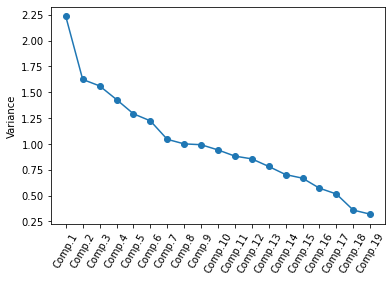

In [0]:
#variance dist across all the principal components
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, hotel_std)

In [0]:
#converting the standard deviation to variance
summary.sdev**2

,Standard deviation
PC1,2.233167
PC2,1.623855
PC3,1.561389
PC4,1.429407
PC5,1.291501
PC6,1.223421
PC7,1.044432
PC8,1.000396
PC9,0.992375
PC10,0.941859


#### Scatterplot

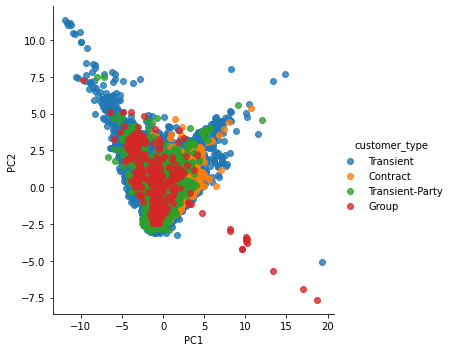

In [0]:

def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2" , "customer_type"])
    sb.lmplot("PC1", "PC2", bar, hue="customer_type", fit_reg=False)

pca_scatter(pca, hotel_std, y)

**Observations**:

* There were 19 PCA in our dataset and that matches the number of columns. This means that no dimensionality reduction took place because there was low dimensionality in our datasets meaning very weak correalation between variables.

* Over 60% of the variance can be explained by the the 8 principal components.

# FEATURE SELECTION

[0.03238143 0.18784032 0.03392915 0.12578103 0.12155335 0.05454482
 0.09023015 0.03546842 0.01284112 0.0036987  0.0038467  0.00220402
 0.00596135 0.04727187 0.02099856 0.15833192 0.01319642 0.04992068]


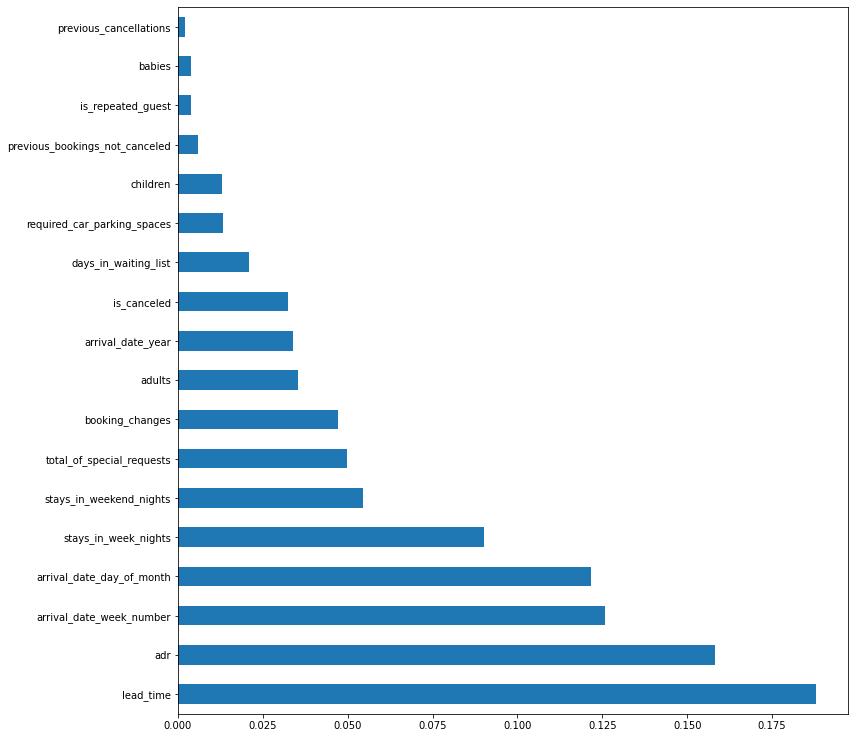

In [0]:
data=hotel_num
X = data.drop('customer_numerical', 1) #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh', figsize=(12, 13))
plt.show()

## Modelling

## KMeans



> Features to be used in clustering were selected based on importnace from the above graph. Majority of the features were numerical.







In [0]:
#selecting numeric data
cluster_data = pd.DataFrame(hotel_df[['lead_time','adr', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'required_car_parking_spaces',
       'total_of_special_requests']])

In [0]:
cluster_data.head(3)

,lead_time,adr,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,required_car_parking_spaces,total_of_special_requests
0,342,0.0,27,1,0,0,2,0.0,0,0,0
1,737,0.0,27,1,0,0,2,0.0,0,0,0
2,7,75.0,27,1,0,1,1,0.0,0,0,0


In [0]:
#scaling the datasets, kmeans is sentive to scales since it measures distance between neighbours so its is important that we standardize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
sc = StandardScaler()
cluster_data = sc.fit_transform(cluster_data)

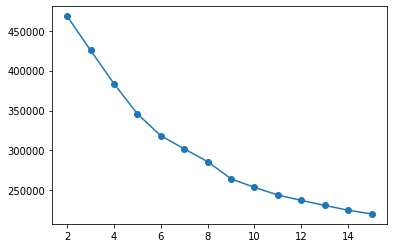

In [0]:
#setting optimal number of clusters
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,]
inertias =[]
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

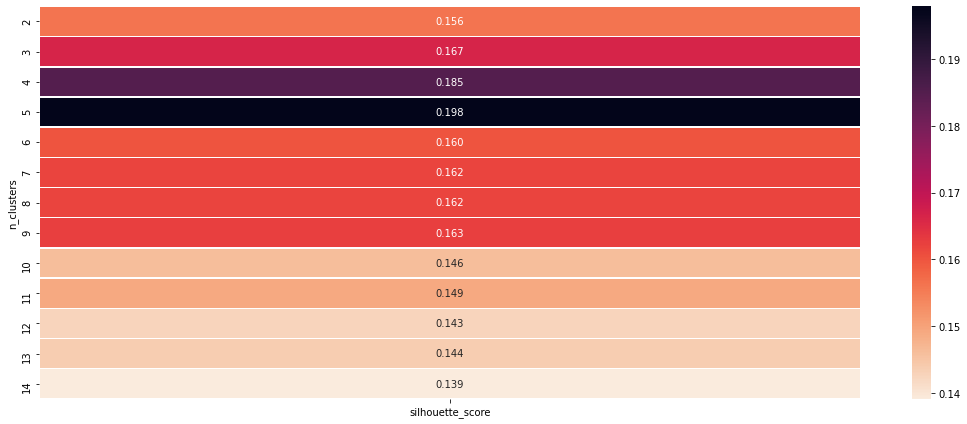

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
#random_range = range(0,10)
results =[]
for c in clusters_range:
    #for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=10)
        cluster_labels = clusterer.fit_predict(cluster_data)
        silhouette_avg = silhouette_score(cluster_data, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters",values="silhouette_score")

plt.figure(figsize=(15,6))
sb.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sb.cm.rocket_r)
plt.tight_layout()

Optimal number of clusters is based on the silhouettee score, where the cluster with the highest score is the optimal number. For this case our clusters will be 5 since it has the highest silhouettee score of 0.193

In [0]:
#Fitting our Kmeans alogrithm 
kmeans_sel = KMeans(n_clusters=5, random_state=10).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

AttributeError: ignored

In [0]:
 def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
    sb.catplot(x="adults",y="stays_in_week_nights", hue=h, palette=pal, data = cluster_data, ax=ax1)
    sb.scatterplot(x="lead_time",y="arrival_date_week_number", hue = h, palette = pal, data = cluster_data, ax=ax2)
    sb.scatterplot(x="lead_time",y="adr", hue=h, palette=pal, data = cluster_data, ax=ax3)
    sb.scatterplot(x="adr",y="arrival_date_week_number", hue=h, palette=pal, data = cluster_data, ax=ax4)
    plt.tight_layout()

NameError: ignored

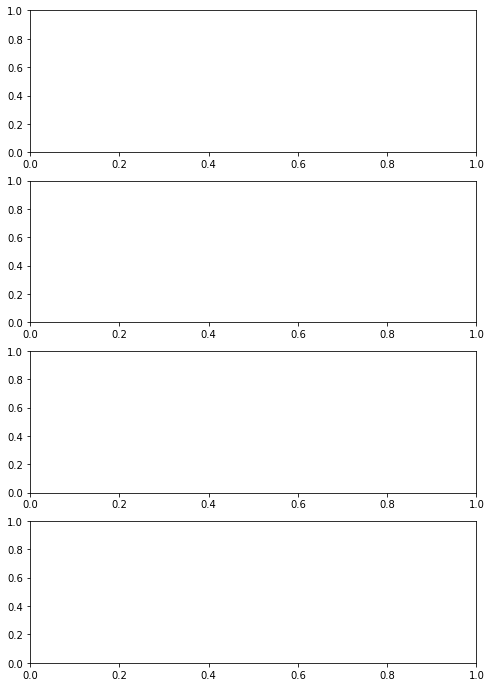

In [0]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,12))
sb.boxplot(x='Cluster', y='lead_time', data = clustered_data, ax = ax1)
sb.boxplot(x='Cluster', y='adr', data = clustered_data, ax = ax2)
sb.boxplot(x='Cluster', y='stays_in_week_nights', data = clustered_data, ax = ax3)
sb.boxplot(x='Cluster', y='arrival_date_week_number', data = clustered_data, ax = ax4)
plt.tight_layout()

ValueError: ignored

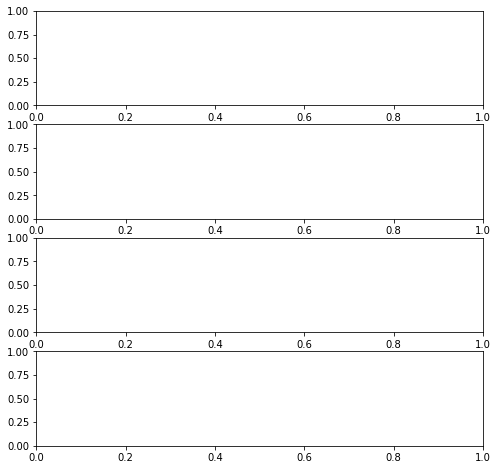

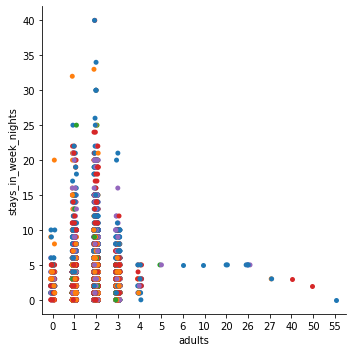

In [0]:
scatters(clustered_data, clustered_data['Cluster'])

In [0]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(0)
grouped_km.to_csv('findiungs.csv')

In [0]:
grouped_km = clustered_data.groupby(['Cluster']).count().round(0)
grouped_km

,lead_time,adr,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,required_car_parking_spaces,total_of_special_requests
Cluster,,,,,,,,,,,
0.0,22287,22287,22287,22287,22287,22287,22287,22287,22287,22287,22287
1.0,9788,9788,9788,9788,9788,9788,9788,9788,9788,9788,9788
2.0,3625,3625,3625,3625,3625,3625,3625,3625,3625,3625,3625
3.0,11703,11703,11703,11703,11703,11703,11703,11703,11703,11703,11703
4.0,12434,12434,12434,12434,12434,12434,12434,12434,12434,12434,12434


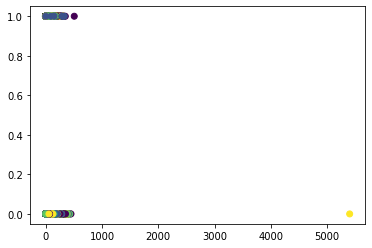

array([0, 1])

In [0]:
plt.scatter(  cluster_data['adr'],hotel_df['is_repeated_guest'], c=clustered_data['Cluster'])
plt.show()
hotel_df['is_repeated_guest'].unique()

# Observations

* Cluster 0 – on average visitors on this cluster have  91 days lead time, have an average daily rate(adr) of **$ 65.0**  arrives on the 18th week, spends one weekend night, 3 week nights and are 2 adults with no kids.

* Cluster 1 – on average visitors on this cluster have  64 days lead time, have an average daily rate(adr) of **$ 75.0**  arrives on the 37th week, spends one weekend night, 3 week nights and are 2 adults with no kids.


* Cluster 2 - on average visitors on this cluster have  71 days lead time, have an average daily rate(adr) of **$ 76.0**  arrives on the 33rd week, spends one weekend night, 3 week nights and are 2 adults with no kids.

* Cluster 3 -on average visitors on this cluster have  66 days lead time, have an average daily rate(adr) of **$ 128.0 (highest)**  arrives on the 30th week, spends one weekend night, 4 week nights and are 2 adults with no kids.

* Cluster 4 -on average visitors on this cluster have  68 days lead time, have an average daily rate(adr) of **$ 118.0 (2nd highest)**  arrives on the 29th week, spends one weekend night, 4 week nights and are 2 adults with no kids.

#Conclusion

1.   Visitors with high lead time(3 months) tend to be low budget and spend less time in the hotel.
2.   lead time for low spenders is low during August/September period( week: 35,36,37,38)
3.   High spenders tender to have low lead time(2 months) and spends more time in the hotels
4.   High spenders make arrivals on July/August -(weeks: 28,29,30,31)
5. Most visitors belonged to Cluster 1, cluster 3, cluster 2, cluster 4 and the last was cluster 0 .
6. No repeat vists to the hotel









# Recommendations

* Introduce incentives/packages that can entice visitors of cluster 0 and cluster 1 to stay longer.
* Improve  packages all clusters to attract repeat visits
* Come up with packages that encourage visitors to visitor during off-seaon

#Clustering Using categorical data

In [0]:
#selecting categorical data
cat_df = hotel_df.select_dtypes(include = 'object')


In [0]:

cat_df.describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,48001,48001,48001,48001,48001,48001,48001,48001,48001,48001,48001,48001
unique,2,12,5,147,7,5,9,11,3,4,3,921
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,33522,6506,37501,18396,27348,37598,28586,22138,47267,38633,29291,153


In [0]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48001 entries, 0 to 66445
Data columns (total 12 columns):
hotel                      48001 non-null object
arrival_date_month         48001 non-null object
meal                       48001 non-null object
country                    48001 non-null object
market_segment             48001 non-null object
distribution_channel       48001 non-null object
reserved_room_type         48001 non-null object
assigned_room_type         48001 non-null object
deposit_type               48001 non-null object
customer_type              48001 non-null object
reservation_status         48001 non-null object
reservation_status_date    48001 non-null object
dtypes: object(12)
memory usage: 4.8+ MB


In [0]:
#Label encoding
cat_num = pd.DataFrame(cat_df.apply(le.fit_transform))

In [0]:
cat_num.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,5,0,111,3,1,2,2,0,2,1,116
1,1,5,0,111,3,1,2,2,0,2,1,116
2,1,5,0,49,3,1,0,2,0,2,1,117


In [0]:
pip install --upgrade kmodes

In [0]:
#importing libaries
from  kmodes.kmodes import KModes


In [0]:
km = KModes(n_clusters = 8, max_iter = 300, init = 'Cao', n_init = 5)
fitClusters_cao = km.fit_predict(cat_num)

In [0]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 1, ..., 7, 7, 4], dtype=uint16)

In [0]:
clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)
clusterCentroidsDf.columns = cat_num.columns
clusterCentroidsDf

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,1,0,111,6,3,0,0,0,2,1,228
1,1,7,0,111,3,1,3,3,0,2,1,797
2,1,5,2,42,6,3,3,3,0,2,0,506
3,0,0,0,47,6,3,4,4,0,2,0,762
4,0,11,0,111,5,3,0,0,0,3,0,186
5,1,8,0,111,3,1,5,5,0,2,1,450
6,1,0,0,49,5,3,3,3,0,0,1,784
7,0,11,0,35,6,3,3,3,0,2,0,380


In [0]:
# Mode of the clusters
clusterCentroidsDf

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,1,0,111,6,3,0,0,0,2,1,228
1,1,7,0,111,3,1,3,3,0,2,1,797
2,1,5,2,42,6,3,3,3,0,2,0,506
3,0,0,0,47,6,3,4,4,0,2,0,762
4,0,11,0,111,5,3,0,0,0,3,0,186
5,1,8,0,111,3,1,5,5,0,2,1,450
6,1,0,0,49,5,3,3,3,0,0,1,784
7,0,11,0,35,6,3,3,3,0,2,0,380


In [0]:
cost = []
for num_clusters in list(range(1,9)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init =2, verbose=0)
    kmode.fit_predict(cat_num)
    cost.append(kmode.cost_)

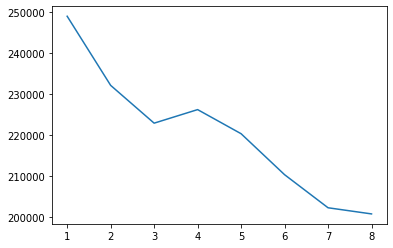

In [0]:
y = np.array([i for i in range(1,9,1)])
plt.plot(y,cost)

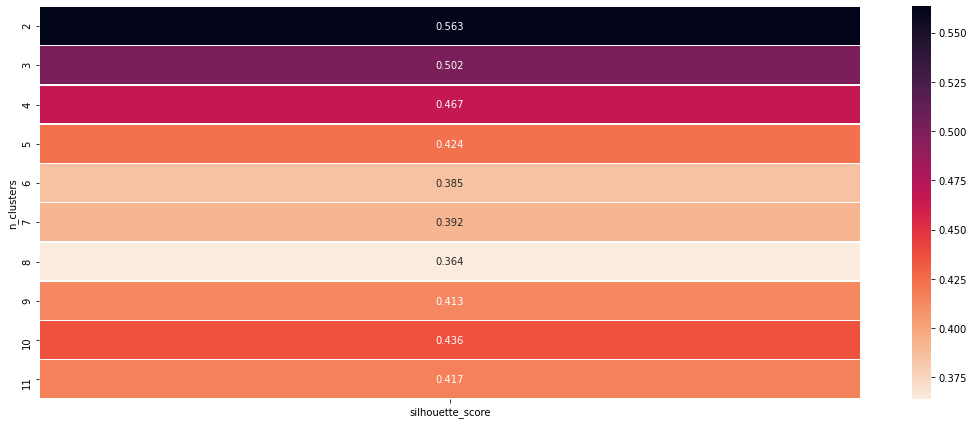

In [0]:
clusters_range = range(2,10)
#random_range = range(0,10)
results =[]
for c in clusters_range:
    #for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=10)
        cluster_labels = clusterer.fit_predict(cat_num)
        silhouette_avg = silhouette_score(cat_num, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters",values="silhouette_score")

plt.figure(figsize=(15,6))
sb.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sb.cm.rocket_r)
plt.tight_layout()

In [0]:
km_op = KModes(n_clusters = 3 ,  n_init =1, max_iter =300, init = 'Cao')


In [0]:
km_ca = km_op.fit_predict(cat_num)


In [0]:
cluster = pd.DataFrame(km_op.cluster_centroids_)
cluster.columns = cat_num.columns
cluster.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,1,0,111,6,3,0,0,0,2,1,228
1,0,7,0,111,6,3,3,3,0,2,0,387
2,1,5,2,49,6,3,3,3,0,2,1,810


In [0]:
km_ca = pd.DataFrame(km_ca)
km_ca.columns = ['clusters']
cat_nw = pd.concat([cat_df,km_ca],axis = 1).reset_index()
cat_nw = cat_nw.drop(['index'], axis =1)
cat_nw.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,clusters
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,0.0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,0.0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,0.0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,0.0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,0.0


KeyError: ignored

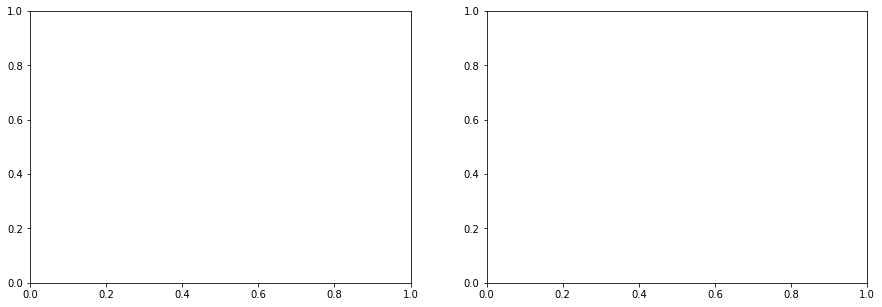

In [0]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sb.countplot(x=cat_df['arrival_date_month'],order=cat_df['arrival_date_month'].value_counts().index,hue=cat_df['clusters'],ax=axs[0])
sb.countplot(x=cat_df['market_segment'],order=cat_df['market_segment'].value_counts().index,hue=cat_df['clusters'],ax=axs[1])

plt.tight_layout()
plt.show()